In [120]:
import pylab
import calendar
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")


In [121]:
data1=pd.read_csv("Dataset.csv")
#Just to remove confusions about spelling errors in further analysis
data1.rename(columns = {'Hipertension':'Hypertension',
                         'Handcap': 'Handicap'}, inplace = True)

In [122]:
#Checking the unique values of the data set
print('Age:',sorted(data1.Age.unique()))
print('Gender:',data1.Gender.unique())
print("Neighbourhood",data1.Neighbourhood.unique())
print('Scholarship:',data1.Scholarship.unique())
print('Hypertension:',data1.Hypertension.unique())
print('Diabetes:',data1.Diabetes.unique())
print('Alcoholism:',data1.Alcoholism.unique())
print('Handicap:',data1.Handicap.unique())
print('SMS_received:',data1.SMS_received.unique())



Age: [-1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 102, 115]
Gender: ['F' 'M']
Neighbourhood ['JARDIM DA PENHA' 'MATA DA PRAIA' 'PONTAL DE CAMBURI' 'REPÚBLICA'
 'GOIABEIRAS' 'ANDORINHAS' 'CONQUISTA' 'NOVA PALESTINA' 'DA PENHA'
 'TABUAZEIRO' 'BENTO FERREIRA' 'SÃO PEDRO' 'SANTA MARTHA' 'SÃO CRISTÓVÃO'
 'MARUÍPE' 'GRANDE VITÓRIA' 'SÃO BENEDITO' 'ILHA DAS CAIEIRAS'
 'SANTO ANDRÉ' 'SOLON BORGES' 'BONFIM' 'JARDIM CAMBURI' 'MARIA ORTIZ'
 'JABOUR' 'ANTÔNIO HONÓRIO' 'RESISTÊNCIA' 'ILHA DE SANTA MARIA'
 'JUCUTUQUARA' 'MONTE BELO' 'MÁRIO CYPRESTE' 'SANTO ANTÔNIO' 'BELA VISTA'
 'PRAIA DO SUÁ' 'SANTA HELENA' 'ITARARÉ' 'INHANGUETÁ' 'UNIVERSITÁRIO'
 'SÃ

In [123]:
data1.head()
Noshow=data1['No-show']
Noshow=Noshow.values

data1.groupby('No-show').size()



No-show
No     88208
Yes    22319
dtype: int64

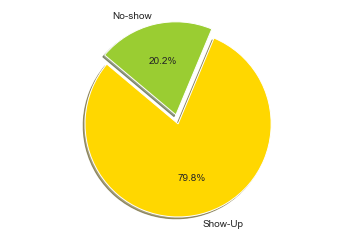

In [124]:
import matplotlib.pyplot as plt

# Data to plot
labels = 'Show-Up', 'No-show'
sizes = [88208, 22319]
colors = ['gold', 'yellowgreen']
explode = (0.1, 0,)  # explode 1st slice

# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')
plt.show()

In [125]:
#Transforming the data into numbers
from sklearn import preprocessing
#Label Encoding of Gender, Neighbourhood, No-show handcap
le = preprocessing.LabelEncoder()

le.fit(data1["Gender"])
data1["Gender"]=le.transform(data1["Gender"])


le.fit(data1["No-show"])
data1["No-show"]=le.transform(data1["No-show"])

le.fit(data1["Neighbourhood"])
data1["Neighbourhood"]=le.transform(data1["Neighbourhood"])
data1.head()



,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No-show
0,2.987250e+13,5642903,0,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,39,0,1,0,0,0,0,0
1,5.589978e+14,5642503,1,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,39,0,0,0,0,0,0,0
2,4.262962e+12,5642549,0,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,45,0,0,0,0,0,0,0
3,8.679512e+11,5642828,0,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,54,0,0,0,0,0,0,0
4,8.841186e+12,5642494,0,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,39,0,1,1,0,0,0,0


In [126]:
data1.groupby('Gender').size()

Gender
0    71840
1    38687
dtype: int64

In [127]:
data1["No-show"][data1["Gender"] == 0].value_counts()

0    57246
1    14594
Name: No-show, dtype: int64

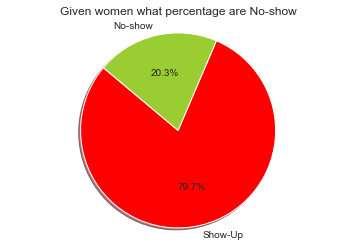

In [128]:
labels = 'Show-Up', 'No-show'
sizes = [57246, 14594]
colors = ['red', 'yellowgreen']
#explode = (0.1, 0,)  # explode 1st slice

# Plot
plt.pie(sizes, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')
plt.title("Given women what percentage are No-show")
plt.show()

In [129]:
data1["No-show"][data1["Gender"] == 1].value_counts()

0    30962
1     7725
Name: No-show, dtype: int64

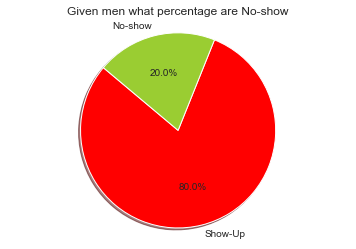

In [130]:
labels = 'Show-Up', 'No-show'
sizes = [30962, 7725]
colors = ['red', 'yellowgreen']
#explode = (0.1, 0,)  # explode 1st slice

# Plot
plt.pie(sizes, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')
plt.title("Given men what percentage are No-show")
plt.show()

In [131]:
data1["No-show"][data1["Scholarship"] == 0].value_counts()

0    79925
1    19741
Name: No-show, dtype: int64

In [132]:
data1["Scholarship"][data1["No-show"] == 1].value_counts()

0    19741
1     2578
Name: Scholarship, dtype: int64

In [133]:
Schlpercent= 2578/(19741+2578)*100
Nonschlp= 19741/(19741+2578)*100

print(Schlpercent)
print(Nonschlp)

list1=[Schlpercent, Nonschlp]

11.55069671580268
88.44930328419733


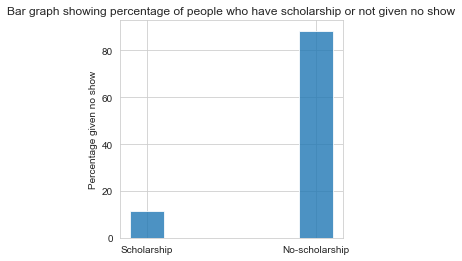

In [134]:
label=['Scholarship', 'Non Scholarship']        
index = np.arange(len(label))
plt.figure(figsize=(4, 4))  # width:20, height:3  
plt.bar(label, list1, align='center', width=0.2, alpha=0.8)
objects=['Scholarship', 'No-scholarship' ]
plt.xticks( label, objects)
plt.ylabel('Percentage given no show')
plt.title('Bar graph showing percentage of people who have scholarship or not given no show')
 
plt.show()

In [135]:
#appointment date
data1["AppointmentDay"] = data1.AppointmentDay.apply(lambda x : x.split("T")[0])

#schedule date
data1["ScheduledDay"] = data1.ScheduledDay.apply(lambda x : x.split("T")[0])

In [136]:
data1.dtypes


PatientId         float64
AppointmentID       int64
Gender              int32
ScheduledDay       object
AppointmentDay     object
Age                 int64
Neighbourhood       int32
Scholarship         int64
Hypertension        int64
Diabetes            int64
Alcoholism          int64
Handicap            int64
SMS_received        int64
No-show             int32
dtype: object

In [137]:
import datetime
data1.ScheduledDay = data1.ScheduledDay.apply(np.datetime64)
data1.AppointmentDay = data1.AppointmentDay.apply(np.datetime64)


data1['timeD']= (data1.AppointmentDay -  data1.ScheduledDay)/np.timedelta64(1, 'D')
print(data1.ScheduledDay.head())
print(data1.AppointmentDay.head())
print(data1.timeD.head())
print(data1.columns)


0   2016-04-29
1   2016-04-29
2   2016-04-29
3   2016-04-29
4   2016-04-29
Name: ScheduledDay, dtype: datetime64[ns]
0   2016-04-29
1   2016-04-29
2   2016-04-29
3   2016-04-29
4   2016-04-29
Name: AppointmentDay, dtype: datetime64[ns]
0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: timeD, dtype: float64
Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hypertension',
       'Diabetes', 'Alcoholism', 'Handicap', 'SMS_received', 'No-show',
       'timeD'],
      dtype='object')


In [138]:
print(sorted(data1.timeD.unique()))

[-6.0, -1.0, 0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0, 32.0, 33.0, 34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 49.0, 50.0, 51.0, 52.0, 53.0, 54.0, 55.0, 56.0, 57.0, 58.0, 59.0, 60.0, 61.0, 62.0, 63.0, 64.0, 65.0, 66.0, 67.0, 68.0, 69.0, 70.0, 71.0, 72.0, 73.0, 74.0, 75.0, 76.0, 77.0, 78.0, 79.0, 80.0, 81.0, 82.0, 83.0, 84.0, 85.0, 86.0, 87.0, 88.0, 89.0, 90.0, 91.0, 92.0, 93.0, 94.0, 95.0, 96.0, 97.0, 98.0, 101.0, 102.0, 103.0, 104.0, 105.0, 107.0, 108.0, 109.0, 110.0, 111.0, 112.0, 115.0, 117.0, 119.0, 122.0, 123.0, 125.0, 126.0, 127.0, 132.0, 133.0, 139.0, 142.0, 146.0, 151.0, 155.0, 162.0, 169.0, 176.0, 179.0]


In [139]:
#Removing negative values
data1.drop(data1[data1.timeD < 0].index, inplace=True)
data1.drop(data1[data1.Age < 0].index, inplace=True)


In [140]:
data1.reset_index()
data1.index.name="Index"
data1.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No-show,timeD
Index,,,,,,,,,,,,,,,
0,2.987250e+13,5642903,0,2016-04-29,2016-04-29,62,39,0,1,0,0,0,0,0,0.0
1,5.589978e+14,5642503,1,2016-04-29,2016-04-29,56,39,0,0,0,0,0,0,0,0.0
2,4.262962e+12,5642549,0,2016-04-29,2016-04-29,62,45,0,0,0,0,0,0,0,0.0
3,8.679512e+11,5642828,0,2016-04-29,2016-04-29,8,54,0,0,0,0,0,0,0,0.0
4,8.841186e+12,5642494,0,2016-04-29,2016-04-29,56,39,0,1,1,0,0,0,0,0.0


In [141]:
data1.shape


(110521, 15)

In [142]:
def probStatus(dataset, group_by):
    df = pds.crosstab(index = dataset[group_by], columns = dataset['No-show']).reset_index()
    df['probShowUp'] = df[0] / (df[0] + df[1])
    return df[[group_by, 'probShowUp']]


C:\Users\rishabhstha\Anaconda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


AttributeError: module 'seaborn' has no attribute 'plt'

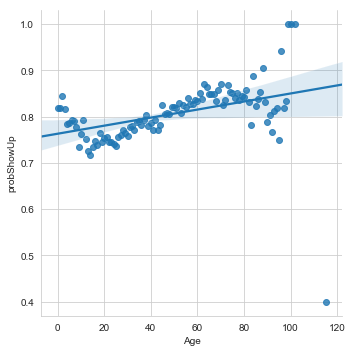

In [143]:
import numpy as np
import pandas as pds
import matplotlib.pyplot as plt
from matplotlib import pylab


sns.lmplot(data = probStatus(data1, 'Age'), x = 'Age', y = 'probShowUp', fit_reg = True)
sns.plt.xlim(0, 100)
sns.plt.title('Probability of showing up with respect to Age')

sns.plt.show()

AttributeError: module 'seaborn' has no attribute 'plt'

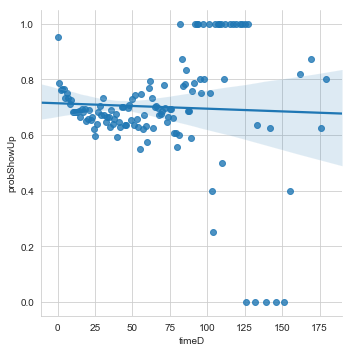

In [144]:
sns.lmplot(data = probStatus(data1, 'timeD'), x = 'timeD', 
           y = 'probShowUp', fit_reg = True)
sns.plt.title('Probability of showing up with respect to Days Difference')
sns.plt.ylim(0, 1)
sns.plt.show()

The number of appointments by week days
Monday 22713
Tuesday 25638
Wednesday 25866
Thursday 17246
Friday 19019
Saturday 39

The number of No-show and percentage by week days
Monday 4689 21.013713363807476
Tuesday 5150 23.079680917809448
Wednesday 5092 22.81975441426907
Thursday 3337 14.95473693645245
Friday 4037 18.091780944698396
Saturday 9 0.04033342296316214


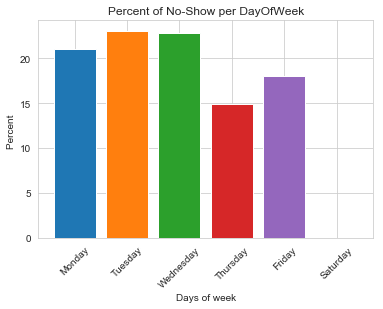

In [145]:
data1['AppointmentDay']=data1['AppointmentDay'].apply(np.datetime64)
data1['day_week_appointment'] = data1['AppointmentDay'].dt.weekday_name
weekdays = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
print("The number of appointments by week days")
for index,i in enumerate(weekdays):
    j=data1[data1.day_week_appointment==i]
    count=len(j)
    total_count=len(data1)
    perc=(count/total_count)*100
    
    print(i,count)

print()
print("The number of No-show and percentage by week days")
no_Show_Yes=data1[data1['No-show']==1]
weekdays = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
for index,i in enumerate(weekdays):
    k=no_Show_Yes[no_Show_Yes.day_week_appointment==i]
    count=len(k)
    total_count=len(no_Show_Yes)
    perc=(count/total_count)*100
    print(i,count,perc)
    plt.bar(index,perc)

plt.xticks(range(len(weekdays)),weekdays, rotation=45)
plt.xlabel("Days of week")
plt.ylabel("Percent ")
plt.title('Percent of No-Show per DayOfWeek')
plt.show()

In [146]:
data1.columns

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hypertension',
       'Diabetes', 'Alcoholism', 'Handicap', 'SMS_received', 'No-show',
       'timeD', 'day_week_appointment'],
      dtype='object')

In [147]:
def dayToNumber(day):
    if day == 'Monday': 
        return 0
    if day == 'Tuesday': 
        return 1
    if day == 'Wednesday': 
        return 2
    if day == 'Thursday': 
        return 3
    if day == 'Friday': 
        return 4
    if day == 'Saturday': 
        return 5
    if day == 'Sunday': 
        return 6
    
data1.day_week_appointment = data1.day_week_appointment.apply(dayToNumber)

In [148]:
data1.columns
data1.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No-show,timeD,day_week_appointment
Index,,,,,,,,,,,,,,,,
0,2.987250e+13,5642903,0,2016-04-29,2016-04-29,62,39,0,1,0,0,0,0,0,0.0,4
1,5.589978e+14,5642503,1,2016-04-29,2016-04-29,56,39,0,0,0,0,0,0,0,0.0,4
2,4.262962e+12,5642549,0,2016-04-29,2016-04-29,62,45,0,0,0,0,0,0,0,0.0,4
3,8.679512e+11,5642828,0,2016-04-29,2016-04-29,8,54,0,0,0,0,0,0,0,0.0,4
4,8.841186e+12,5642494,0,2016-04-29,2016-04-29,56,39,0,1,1,0,0,0,0,0.0,4


In [149]:
data1=data1.drop(["AppointmentDay","ScheduledDay","PatientId","AppointmentID","timeD"],axis=1)
labels=data1.pop("No-show")


In [150]:
data1=data1.drop(["day_week_appointment"], axis=1)

In [151]:
data1.head()

,Gender,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received
Index,,,,,,,,,
0,0,62,39,0,1,0,0,0,0
1,1,56,39,0,0,0,0,0,0
2,0,62,45,0,0,0,0,0,0
3,0,8,54,0,0,0,0,0,0
4,0,56,39,0,1,1,0,0,0
